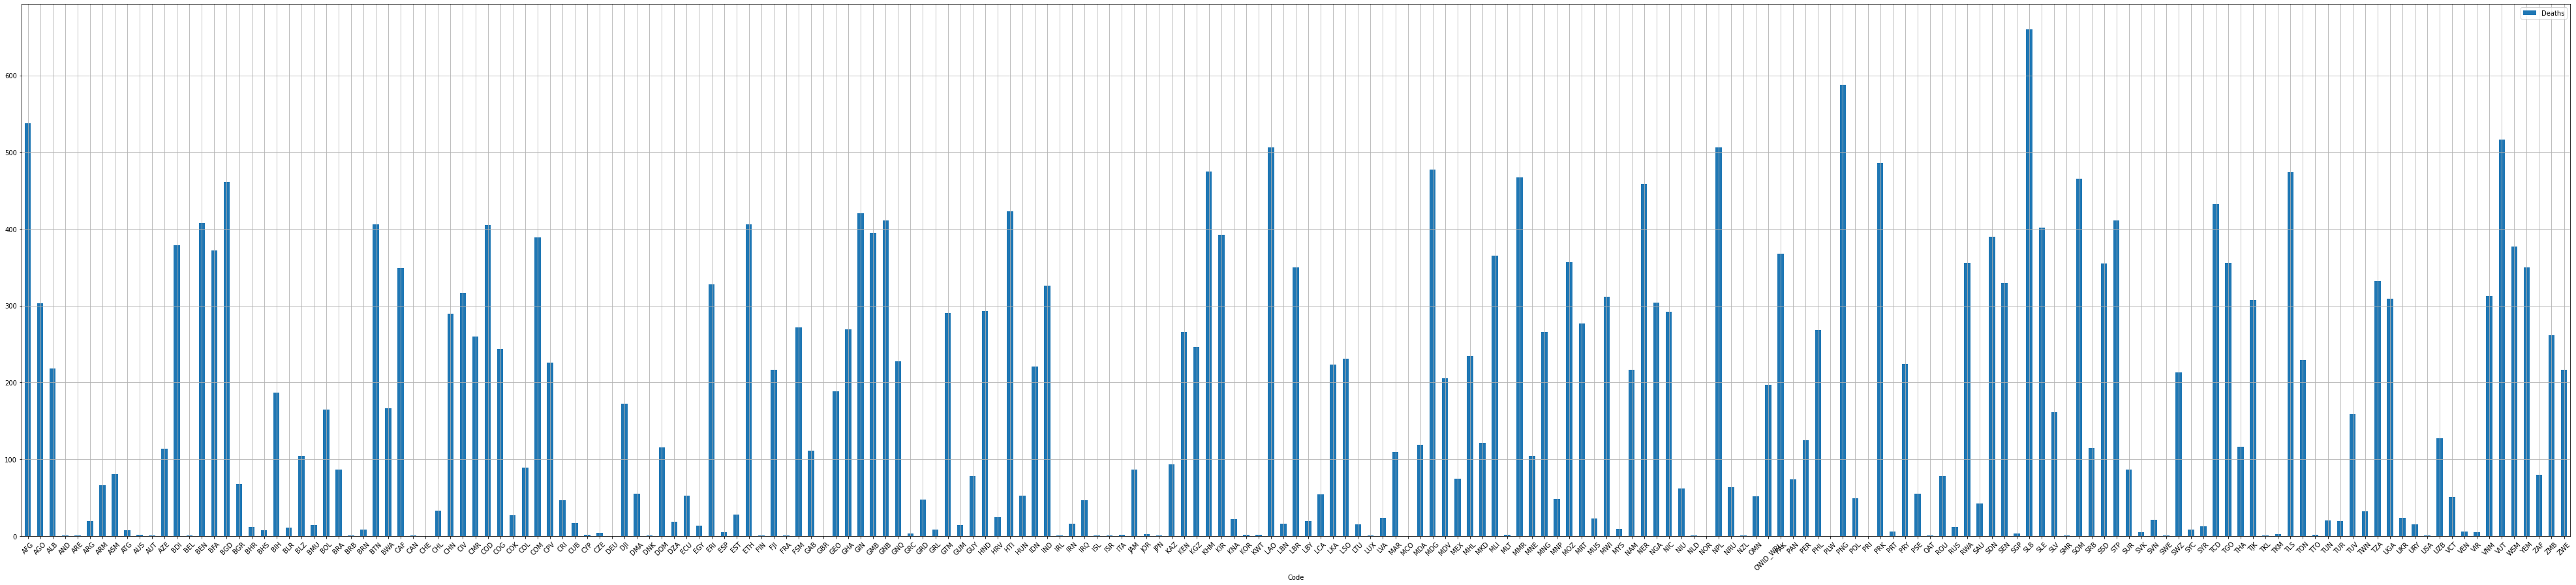

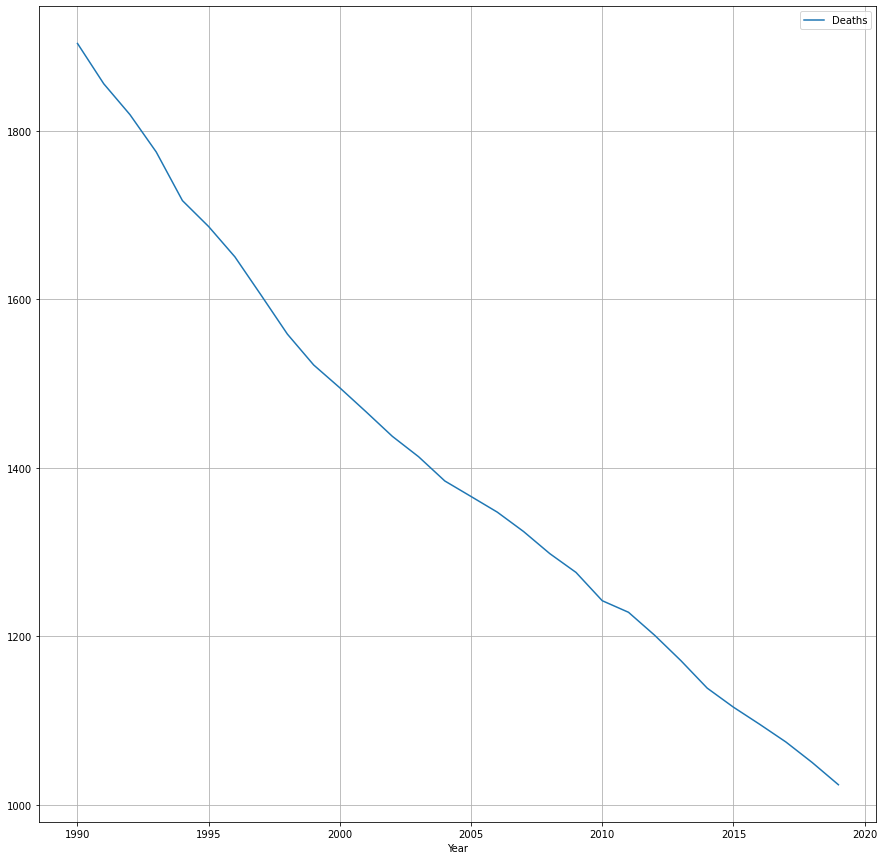

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pathlib
import filecmp

style = 'default'
indoor_pollution = 'https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2022/2022-04-12/indoor_pollution.csv'

df = pd.read_csv(indoor_pollution, header=None, skiprows=1)
df.columns = ["Entity", "Code", "Year", "Deaths"]

death_df_by_country = df[[x for x in df.columns if 'Deaths' in x] + ['Code']]
summarized_death_df_by_region = death_df_by_country.groupby('Code').sum()
summarized_death_df_by_region.plot(kind='bar', rot=45, figsize=(70, 15))
plt.grid()


death_df_by_year = df[[x for x in df.columns if 'Deaths' in x] + ['Year']]
summarized_death_df_by_year = death_df_by_year.groupby('Year').sum()
summarized_death_df_by_year.plot(figsize=(15, 15))
plt.grid()

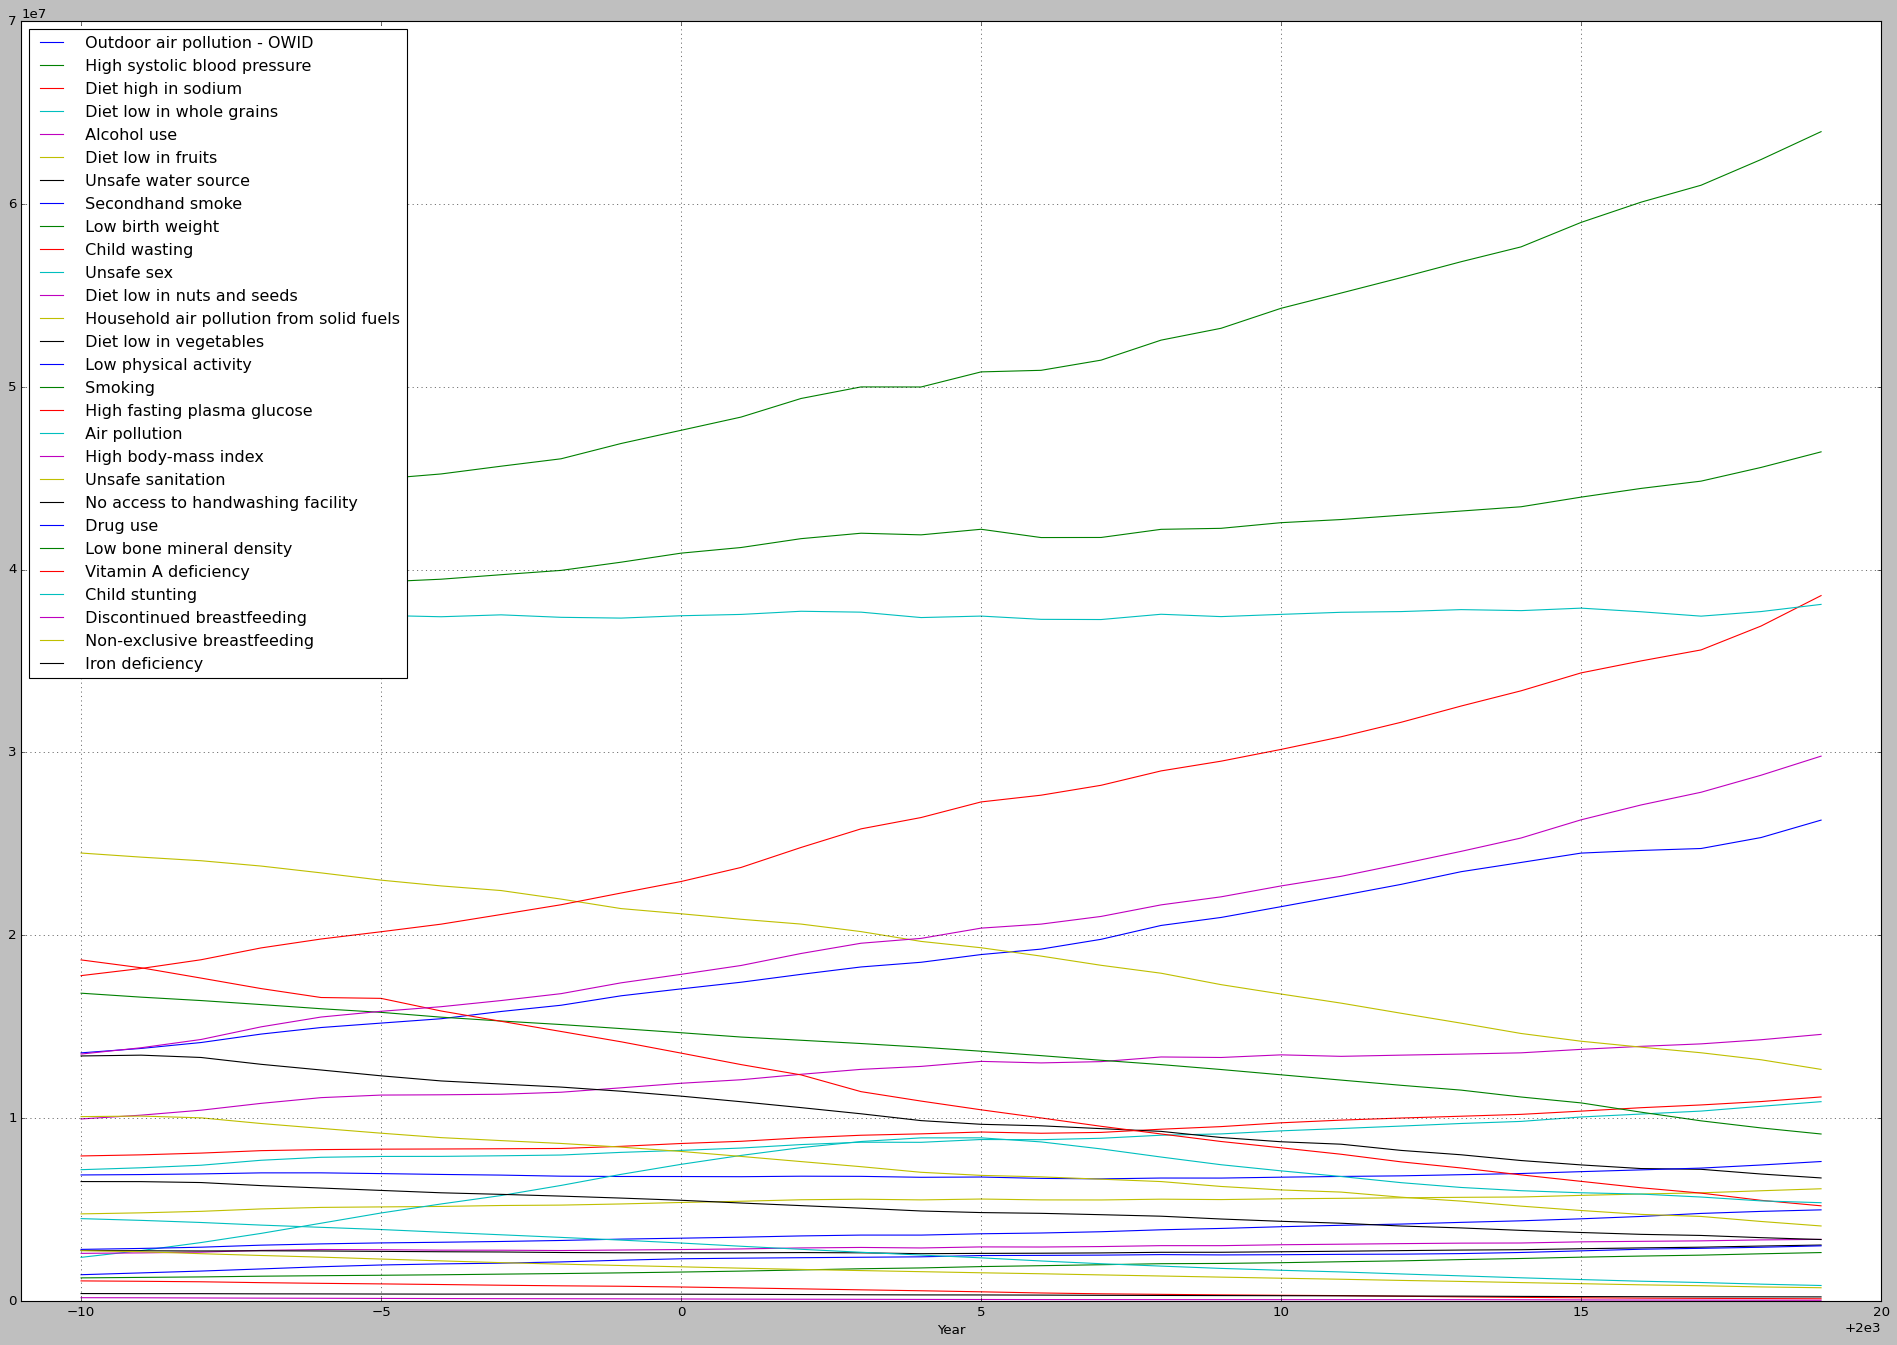

In [288]:
try:
    __here__ = pathlib.Path(__file__).parent.resolve()
except NameError:
    __here__ = pathlib.Path('.').resolve()


death_factor = pathlib.Path(__here__) / r'number-of-deaths-by-risk-factor.csv'

df1 = pd.read_csv(death_factor)
df2 = df1.groupby('Year').sum()
df2.plot(figsize=(30,20))

plt.ylim(0, 70_000_000)
plt.xlim(1989, 2020)
plt.grid()

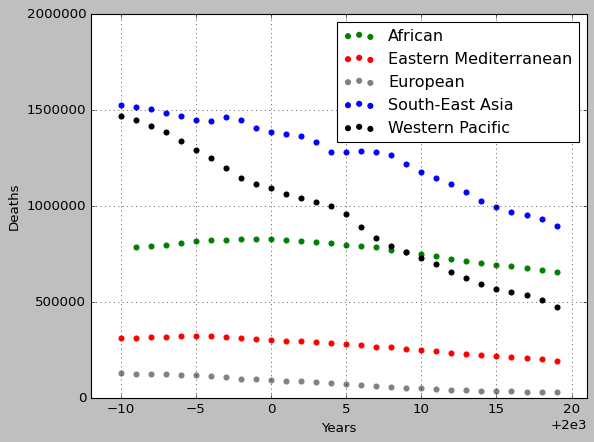

In [289]:
try:
    __here__ = pathlib.Path(__file__).parent.resolve()
except NameError:
    __here__ = pathlib.Path('.').resolve()


death_factor = pathlib.Path(__here__) / r'household-air-pollution-deaths-by-region.csv'

df4 = pd.read_csv(deaths_by_region, header=None, skiprows=1)
df4.columns = ["Entity", "Year", "Deaths"]

fig, ax = plt.subplots()
for i in range(1, 150):
    if i == 1: ax.scatter(df4['Year'][i], df4['Deaths'][i], color = 'g', label= 'African')
    if 1 < i < 30: ax.scatter(df4['Year'][i], df4['Deaths'][i], color = 'g')

    if i == 30: ax.scatter(df4['Year'][i], df4['Deaths'][i], color = 'r', label= 'Eastern Mediterranean')
    if 30 < i < 60 :ax.scatter(df4['Year'][i], df4['Deaths'][i], color = 'r')

    if i == 60: ax.scatter(df4['Year'][i], df4['Deaths'][i], color = 'grey', label= 'European')
    if 60 < i < 90 :ax.scatter(df4['Year'][i], df4['Deaths'][i], color = 'grey')

    if i == 90: ax.scatter(df4['Year'][i], df4['Deaths'][i], color = 'blue', label= 'South-East Asia')
    if 90 < i < 120 :ax.scatter(df4['Year'][i], df4['Deaths'][i], color = 'blue')

    if i == 120: ax.scatter(df4['Year'][i], df4['Deaths'][i], color = 'black', label= 'Western Pacific')
    if 120 < i :ax.scatter(df4['Year'][i], df4['Deaths'][i], color = 'black')

plt.xlabel('Years')
plt.ylabel('Deaths')
plt.ylim(0, 2_000_000)
plt.xlim(1988, 2021)

plt.grid()
leg = ax.legend()

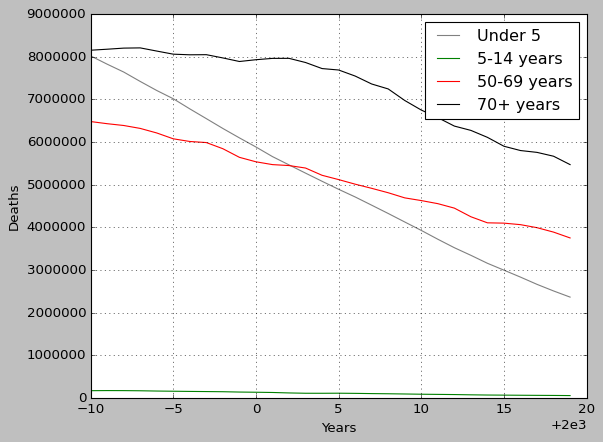

In [291]:
try:
    __here__ = pathlib.Path(__file__).parent.resolve()
except NameError:
    __here__ = pathlib.Path('.').resolve()

death_factor = pathlib.Path(__here__) / r'deaths-from-indoor-air-pollution-by-age.csv'

df5 = pd.read_csv(death_by_age, skiprows=0)
under5 = ((df5[[x for x in df5.columns if 'Under 5' in x] + ['Year']]).groupby('Year').sum())
from5to14 = ((df5[[x for x in df5.columns if '5-14 years' in x] + ['Year']]).groupby('Year').sum())
from15to49 = ((df5[[x for x in df5.columns if '15-49 years	' in x] + ['Year']]).groupby('Year').sum())
from50to69 = ((df5[[x for x in df5.columns if '50-69 years' in x] + ['Year']]).groupby('Year').sum())
from70 = ((df5[[x for x in df5.columns if '70+ years' in x] + ['Year']]).groupby('Year').sum())

fig, ax = plt.subplots()
ax.plot(under5, color = 'grey', label='Under 5')
ax.plot(from5to14, color = 'g', label='5-14 years')
ax.plot(from15to49, color = 'blue', label='15-49 years')
ax.plot(from50to69, color = 'r', label='50-69 years')
ax.plot(from70, color = 'black', label='70+ years')

plt.xlabel('Years')
plt.ylabel('Deaths')
plt.grid()
leg = ax.legend()